In [78]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
ontime = pd.read_csv('/Users/riadsouza/Downloads/BTS_ontime_Oct2023.zip')
ontime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598968 entries, 0 to 598967
Data columns (total 29 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           598968 non-null  int64  
 1   DAY_OF_WEEK            598968 non-null  int64  
 2   FL_DATE                598968 non-null  object 
 3   OP_UNIQUE_CARRIER      598968 non-null  object 
 4   OP_CARRIER_AIRLINE_ID  598968 non-null  int64  
 5   OP_CARRIER             598968 non-null  object 
 6   ORIGIN_AIRPORT_ID      598968 non-null  int64  
 7   ORIGIN_AIRPORT_SEQ_ID  598968 non-null  int64  
 8   ORIGIN_CITY_MARKET_ID  598968 non-null  int64  
 9   DEST_AIRPORT_ID        598968 non-null  int64  
 10  DEST_AIRPORT_SEQ_ID    598968 non-null  int64  
 11  DEST_CITY_MARKET_ID    598968 non-null  int64  
 12  CRS_DEP_TIME           598968 non-null  int64  
 13  DEP_DELAY_NEW          596952 non-null  float64
 14  DEP_DEL15              596952 non-nu

<Axes: >

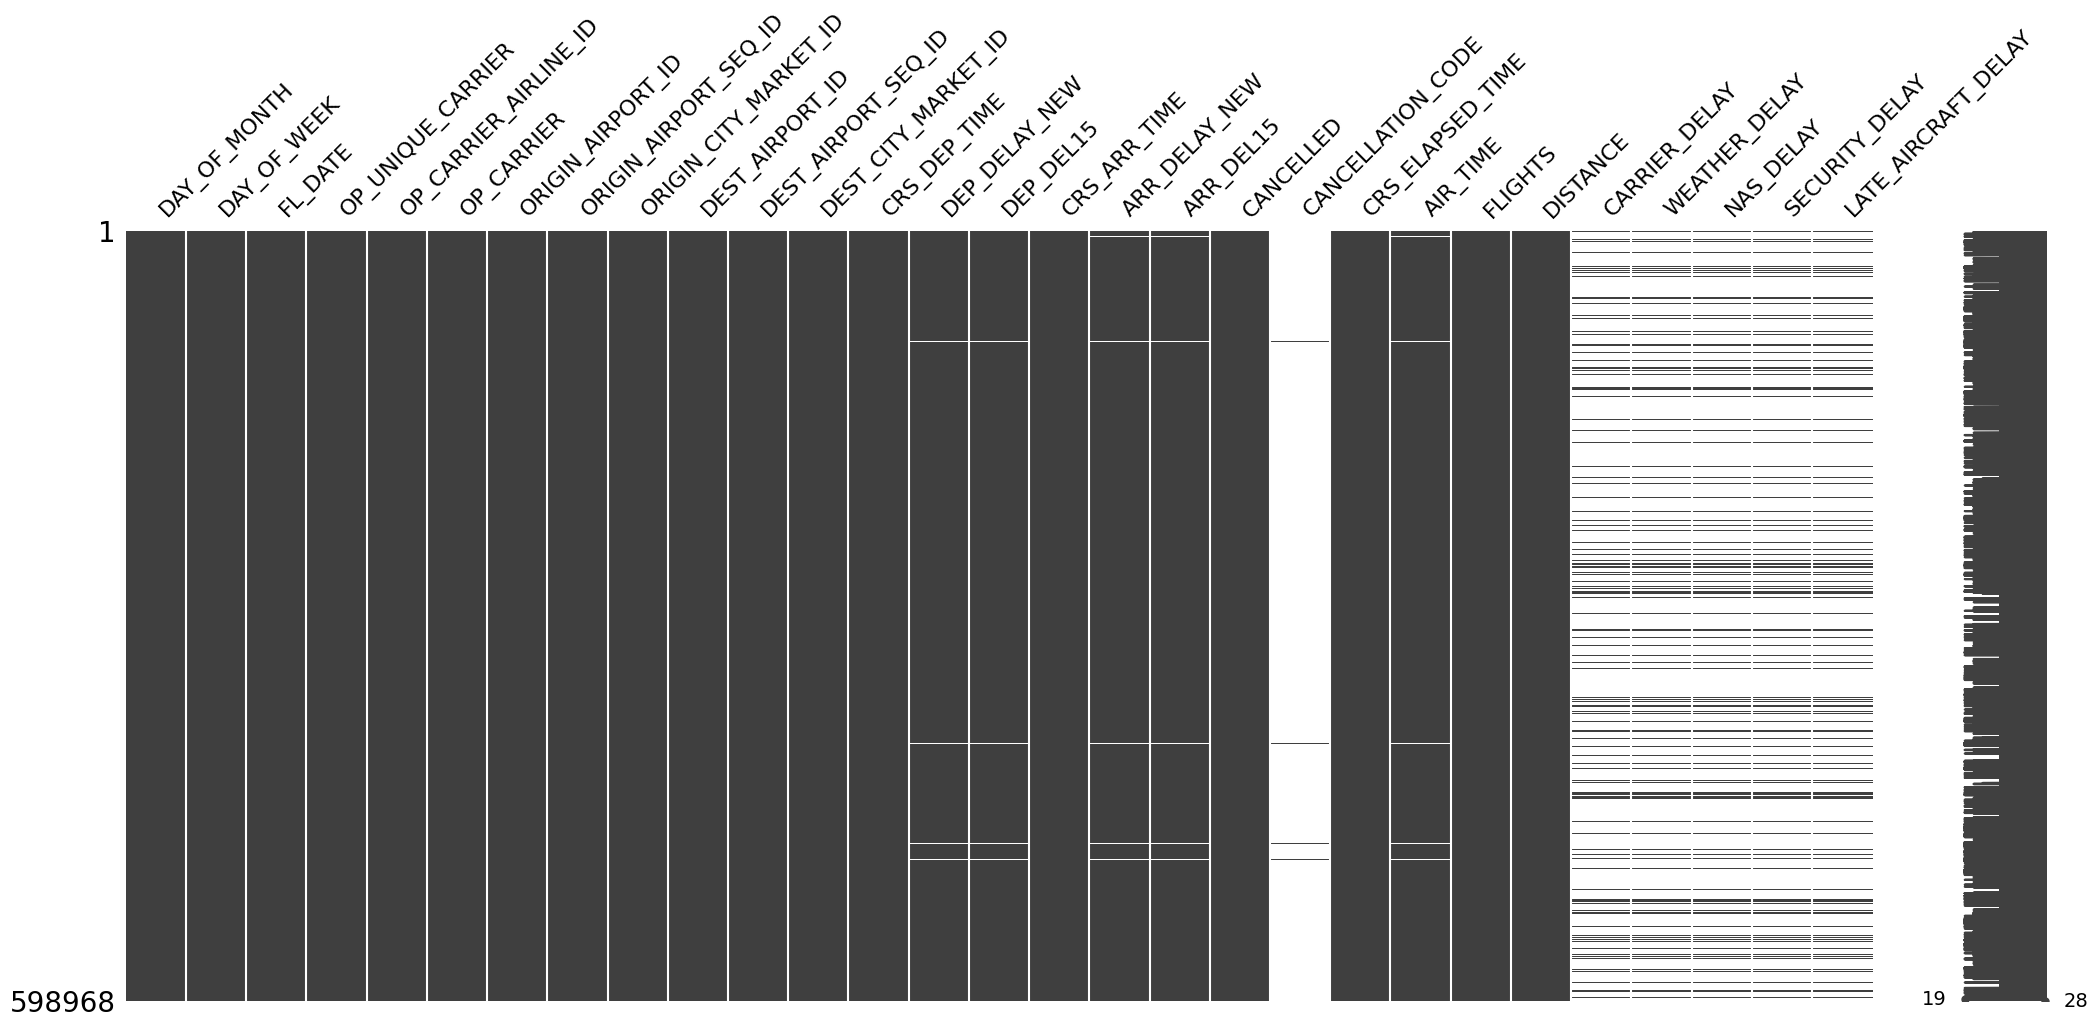

In [79]:
## Problem 1
msno.matrix(ontime)

Because there are so many missing values for "CANCELLATION_CODE" we can infer that only flights that were canceled have values and flights that were not canceled do not have values for this variable. This is a case of missing at random. The missing values for "CARRIER_DELAY", "WEATHER_DELAY", "NAS_DELAY', "SECURITY_DELAY", "LATE_AIRCRAFT_DELAY" are also missing at random. The variables are missing values if they were not delayed due to their respective explanation. Notably, "ARR_DEL15", "ARR_DELAY_NEW", "DEP_DELAY_NEW", "DEP_DEL15",  and "AIR_TIME" are missing values where "CANCELLATION_CODE" has values, meaning these variables are also missing at random. "AIR_DELAY_NEW", "ARR_DEL15", and "AIR_TIME" are also missing one value where "CANCELLATION_CODE" is also missing. I would not impudate any of these, as there seems to be a structure to when certain values are missing, and impudation could introduce bias.

In [80]:
# Problem 2
ontimeNew = ontime[ontime['ARR_DEL15'].notna() | ontime['CANCELLATION_CODE'].notna()]
ontimeNew.head()

,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,DEST_AIRPORT_ID,...,CANCELLATION_CODE,CRS_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,1,7,10/1/2023 12:00:00 AM,9E,20363,9E,10135,1013506,30135,10397,...,NaN,133.0,103.0,1.0,692.0,NaN,NaN,NaN,NaN,NaN
1,1,7,10/1/2023 12:00:00 AM,9E,20363,9E,10135,1013506,30135,10397,...,NaN,129.0,105.0,1.0,692.0,NaN,NaN,NaN,NaN,NaN
2,1,7,10/1/2023 12:00:00 AM,9E,20363,9E,10135,1013506,30135,10397,...,NaN,134.0,95.0,1.0,692.0,NaN,NaN,NaN,NaN,NaN
3,1,7,10/1/2023 12:00:00 AM,9E,20363,9E,10146,1014602,30146,10397,...,NaN,71.0,39.0,1.0,145.0,NaN,NaN,NaN,NaN,NaN
4,1,7,10/1/2023 12:00:00 AM,9E,20363,9E,10146,1014602,30146,10397,...,NaN,69.0,33.0,1.0,145.0,NaN,NaN,NaN,NaN,NaN


I believe we should remove values where "ARR_DEL15","ARR_DELAY_NEW" and "CACELLATION_CODE" are all null, because this does not fit with the structure of the rest of the missing values.

Text(0, 0.5, 'Number of Flights')

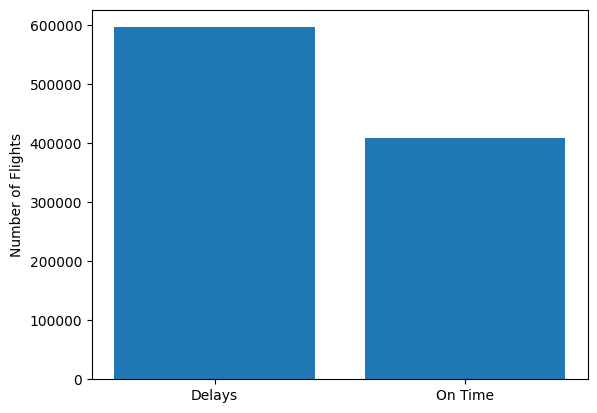

In [81]:
# Problem 3
plt.bar(['Delays','On Time'],[sum(ontimeNew['ARR_DELAY_NEW']>=0), sum(ontimeNew['ARR_DELAY_NEW']==0)])
plt.ylabel('Number of Flights')

In [107]:
print('The average delay time is ', round(((ontimeNew['ARR_DELAY_NEW'][ontimeNew['ARR_DELAY_NEW']>0]).mean()), 2), " minutes.")

The average delay time is  33.67  minutes.


Text(0.5, 0, 'Delay Reason')

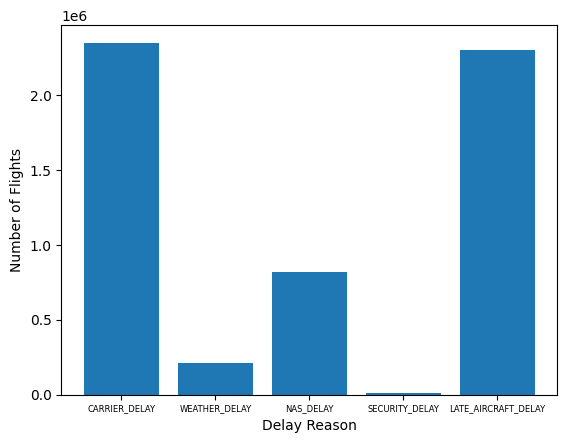

In [83]:
delayCause = ontimeNew[['CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']][ontimeNew['ARR_DELAY_NEW']>0]
plt.bar(delayCause.columns, delayCause.sum())
plt.xticks(fontsize=6)
plt.ylabel('Number of Flights')
plt.xlabel('Delay Reason')

Text(0, 0.5, 'Arrival Delay')

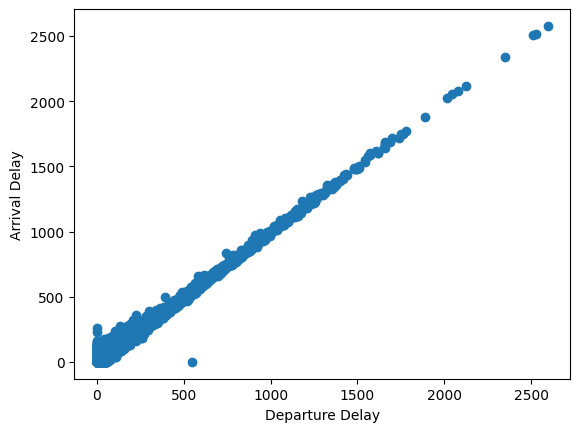

In [84]:
# Problem 4
plt.scatter(ontimeNew['DEP_DELAY_NEW'], ontimeNew['ARR_DELAY_NEW'])
plt.xlabel('Departure Delay')
plt.ylabel('Arrival Delay')

The relationship between Departure Delay and Arrival Delay is mostly linear. While it is not a perfect linear relationship, it is very close.

Text(0, 0.5, 'Departure Delay')

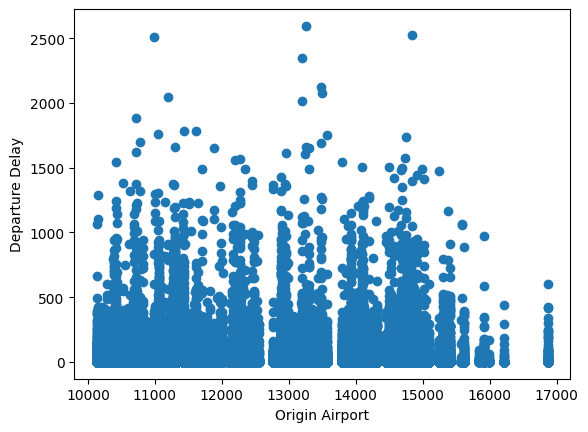

In [85]:
plt.scatter(ontimeNew['ORIGIN_AIRPORT_ID'], ontimeNew['DEP_DELAY_NEW'])
plt.xlabel('Origin Airport')
plt.ylabel('Departure Delay')

Delays in departure under 500 are common across all airports. Some origin airports have less delays than others, but this could be due to a variety of reasons.

/var/folders/gt/82p2rwz11kb63dylzyxfy0yh0000gn/T/ipykernel_64171/2050856029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ontimeNew['aircraftDelay'] = ontimeNew['LATE_AIRCRAFT_DELAY']>0


Text(0, 0.5, 'Proportion')

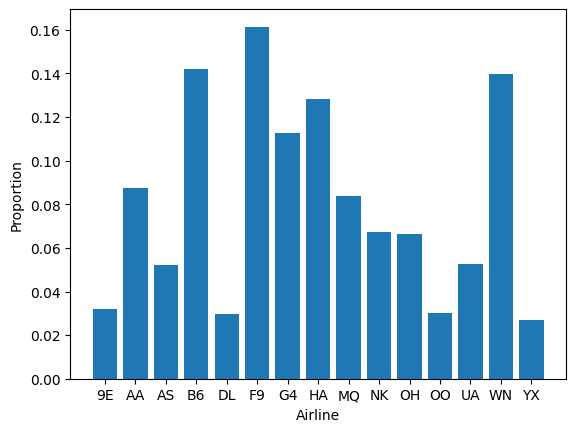

In [86]:
ontimeNew['aircraftDelay'] = ontimeNew['LATE_AIRCRAFT_DELAY']>0
plt.bar(ontimeNew['OP_CARRIER'].unique(), ontimeNew.groupby(['OP_CARRIER'])['aircraftDelay'].mean())
plt.xlabel('Airline')
plt.ylabel('Proportion')

Text(0, 0.5, 'Proportion')

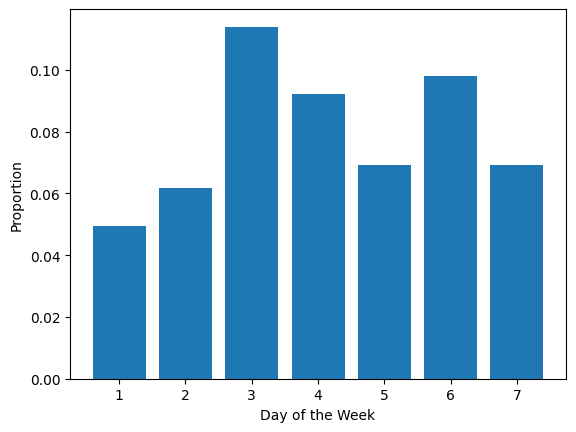

In [87]:
plt.bar(ontimeNew['DAY_OF_WEEK'].unique(), ontimeNew.groupby(['DAY_OF_WEEK'])['aircraftDelay'].mean())
plt.xlabel('Day of the Week')
plt.ylabel('Proportion')

In [92]:

#Get all unique to values 
#Get all unique from values 
#Iterate through a double for loop where i = to and j = from 
#Take the mean delays --> heatmap

print('The proportion of delays by flight legs are: ', ontimeNew.groupby(['ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID'])['aircraftDelay'].mean())



The proportion of delays by flight legs are:  ORIGIN_AIRPORT_ID  DEST_AIRPORT_ID
10135              10397              0.011628
                   10693              0.000000
                   11057              0.052632
                   11292              0.000000
                   11697              0.000000
                                        ...   
15991              12523              0.032258
16218              11298              0.000000
                   14107              0.018692
16869              11292              0.053763
                   13487              0.000000
Name: aircraftDelay, Length: 5517, dtype: float64
